# 📘 Logistic Regression using Gradient Descent

---

## 🧠 Introduction

Logistic Regression is a classification algorithm used to predict binary outcomes (0 or 1) based on input features.

The hypothesis function uses the **sigmoid function**:

```math
h_\theta(x) = \sigma(z) = \frac{1}{1 + e^{-z}} \quad \text{where } z = \theta^T x
```

---

## 🎯 Goal

Minimize the **log loss** (cross-entropy) cost function:

```math
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
```

where:

* `m` is the number of training examples
* `y^{(i)}` is the actual label
* `h_θ(x^{(i)})` is the predicted probability

---

## 🔁 Gradient Descent Algorithm

To minimize the cost, we update the parameters using:

```math
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
```

Where `α` is the learning rate.

---

## 📐 Gradient of Cost Function

For each parameter `θ_j`, the partial derivative is:

```math
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
```

Hence, the vectorized update rule becomes:

```math
\theta := \theta - \alpha \cdot \frac{1}{m} X^T (\hat{y} - y)
```

Where:

* `X` is the feature matrix
* `y` is the vector of actual labels
* `\hat{y} = \sigma(X \theta)` is the vector of predicted probabilities

---

## 🔧 Algorithm Steps

1. Initialize `θ` with zeros or small random values.
2. Repeat until convergence:

   * Compute `\hat{y} = \sigma(X \theta)`
   * Compute the gradient: `\nabla J(\theta) = \frac{1}{m} X^T (\hat{y} - y)`
   * Update parameters: `\theta := \theta - \alpha \cdot \nabla J(\theta)`

---

## 🧪 Example

Assume:

* `m = 3` training examples
* `X = [[1, x1], [1, x2], [1, x3]]` with bias term included
* `y = [0, 1, 1]`

Perform gradient descent updates using the steps above.

---

## 📌 Summary

* Logistic regression uses the sigmoid to map outputs to (0, 1)
* Loss function: cross-entropy (log loss)
* Optimization: gradient descent using partial derivatives
* Efficient and widely used for binary classification tasks


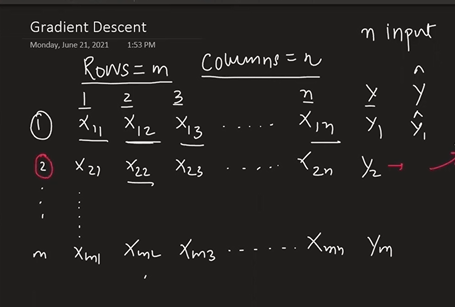

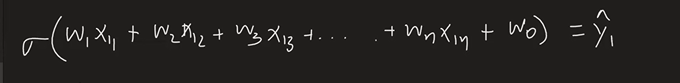

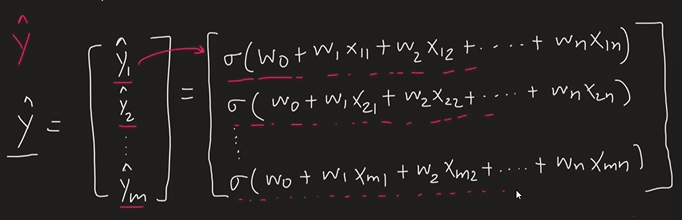

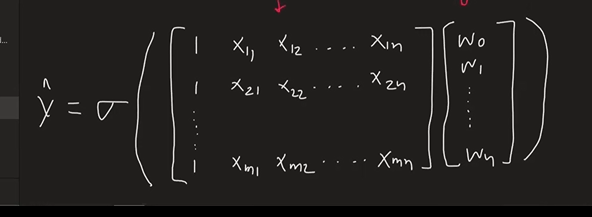

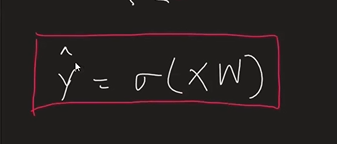

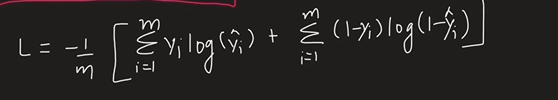

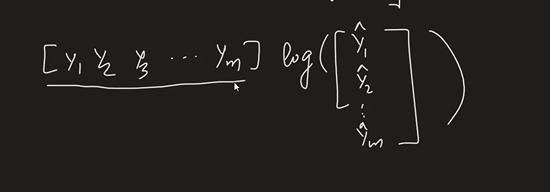

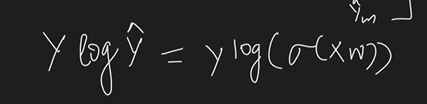

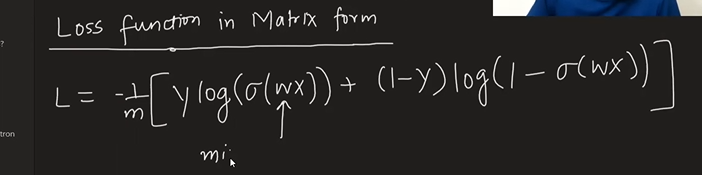

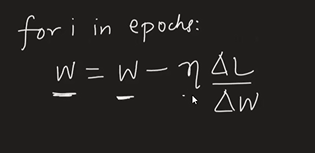

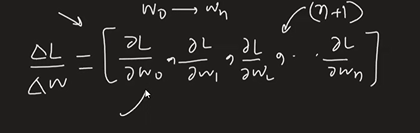

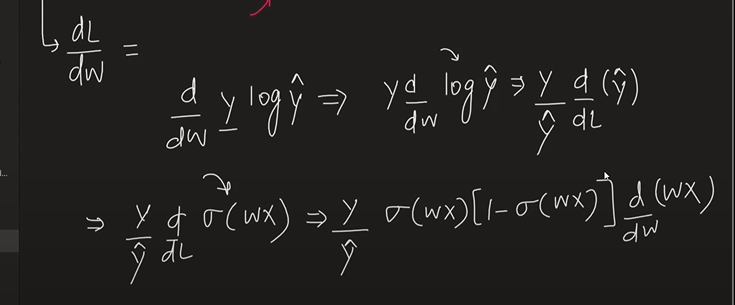

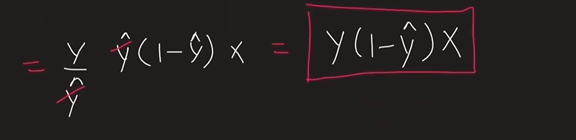

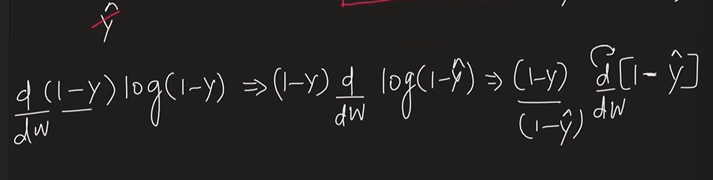

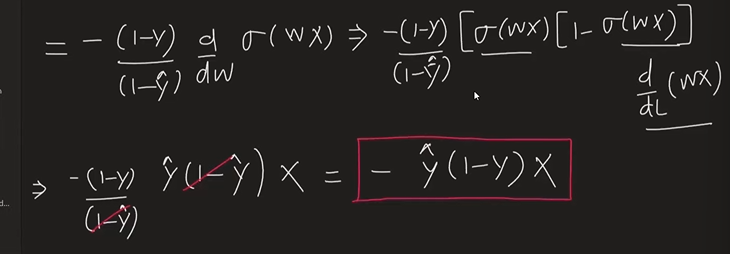

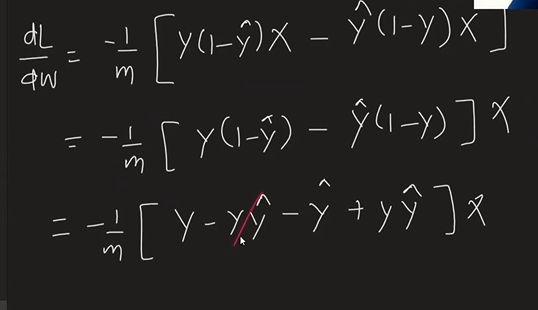

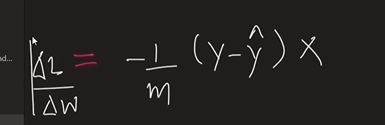

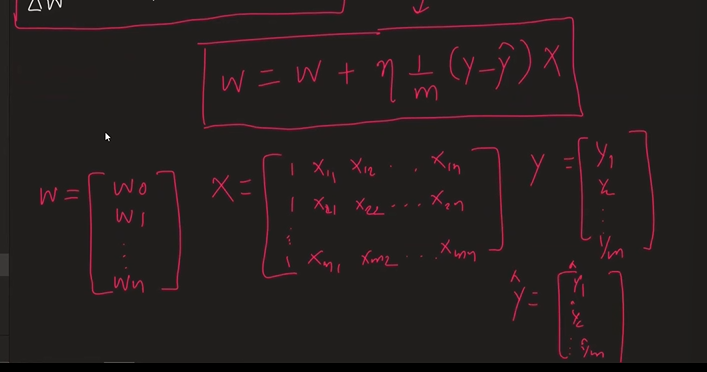

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt

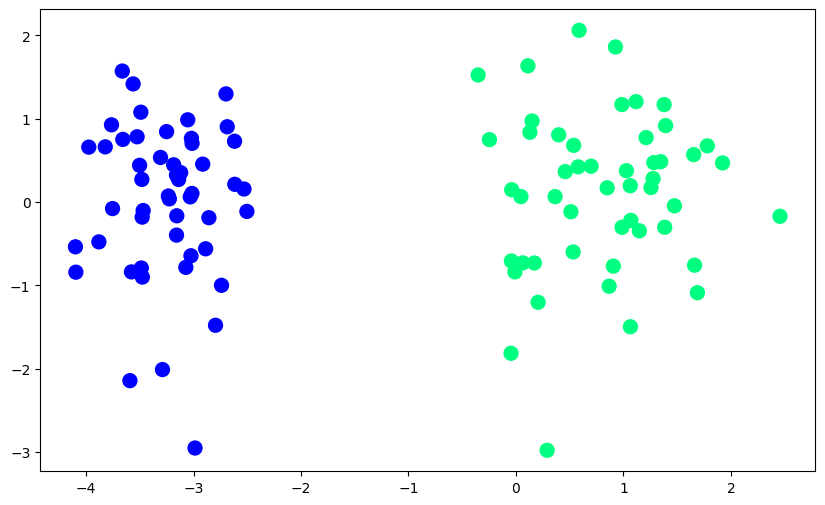

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [16]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

LogisticRegression(penalty=None, solver='sag')

In [17]:
print(lor.coef_)
print(lor.intercept_)

[[5.03567338 0.28070578]]
[4.93141831]


In [18]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [19]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [20]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [21]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [22]:
coef_,intercept_ = gd(X,y)

In [23]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [24]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

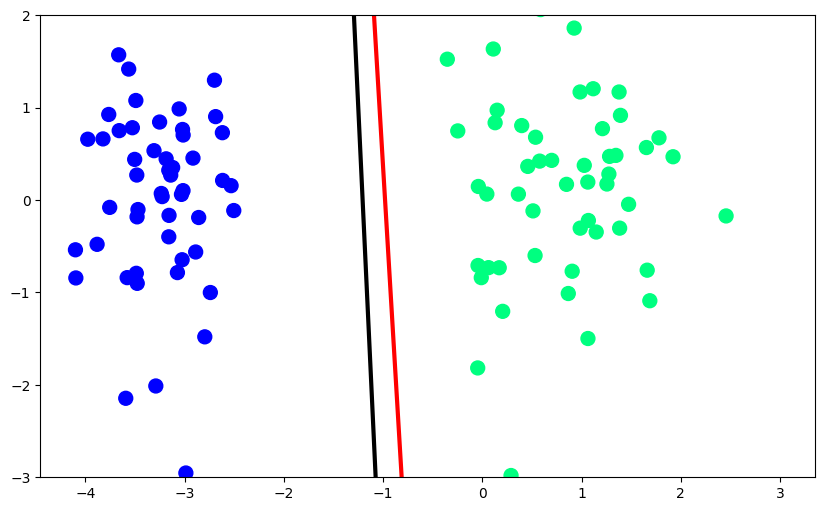

In [25]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)